# Transferência de calor e mecânica dos sólidos
## APS 2 - Aplicação do método de diferenças finitas
### Grupo 10

### Membros do grupo
* João Victor Pazotti Silva
* Luca Coutinho Melão
* Thiago Hampl
* Paulo Souza Chade

## 1) Introdução do problema

Desenvolvimento de uma função em Python para avaliar o comportamento da temperatura de um dissipador de calor (aleta) aplicando técnicas numéricas de simulação. Abaixo nos tópicos 2 e 3 é possível ver a solução comentada da atividade. 

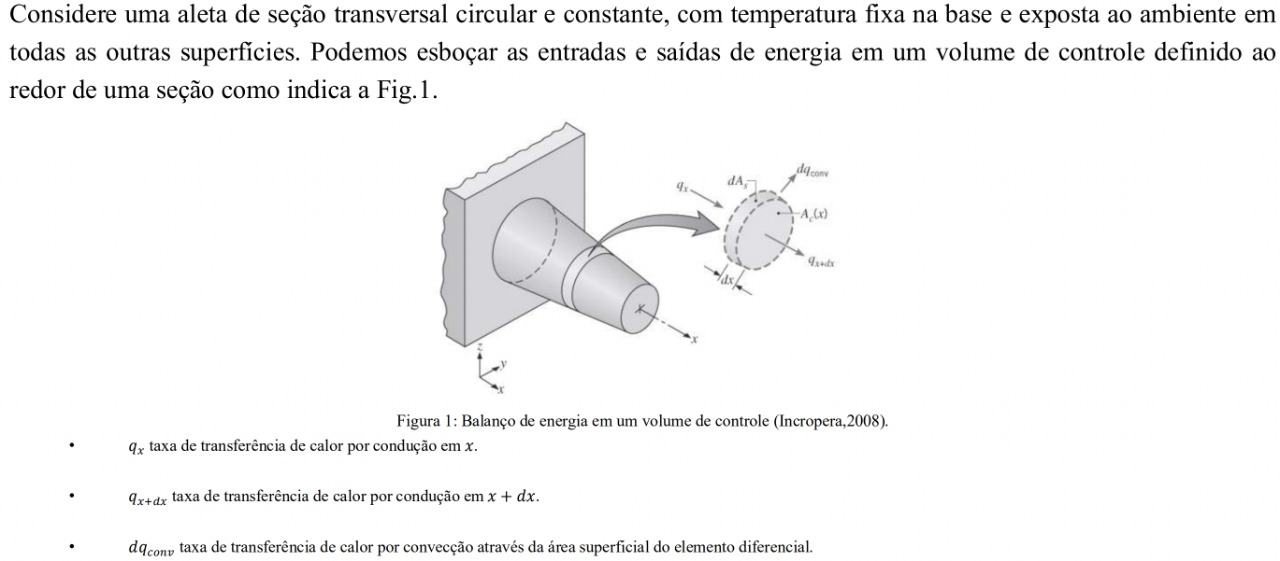

## 2) Desenvolvimento das equações

$$ T _ { i } ^ { l + 1 } - T _ { i } ^ { l } = ( \frac { T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } } { \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T _ { i } ^ { l } - T _ { \infty } ) ) \cdot ( \alpha \cdot \Delta t ) \Rightarrow $$

$$\Rightarrow  T _ { i } ^ { l + 1 } = ( \frac { T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } } { \Delta x ^ { 2 } } - \frac { h P } { k A _ { tr } } ( T _ { i } ^ { l } - T _ { c } ) ) \cdot ( \alpha \cdot \Delta t ) + T _ { i } ^ { l } \Rightarrow $$

$$ \Rightarrow T _ { i } ^ { l + 1 } = \frac { \alpha \cdot \Delta t } { \Delta x ^ { 2 } } ( T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } ) - \frac { \alpha \cdot \Delta t \cdot h P } { k A _ { t r } } ( T _ { i } ^ { l } - T _ { \infty } ) + T _ { i } ^ { l } \Rightarrow $$

$$\Rightarrow T _ { i } ^ { l + 1 } = { \alpha \cdot } { \Delta x } ({\frac{1}{ \Delta x^{2}}}\cdot T _ { i + 1 } - 2 T _ { i } + T _ { i - 1 } ) - \frac {  h P } { k A _ { t r } } ( T _ { i } ^ { l } - T _ { \infty } ) + T _ { i } ^ { l }$$ 

### Primeira derivada:

$$\frac { \partial T } { \partial t } = \frac { T _ { i } ^ { l + 1 } - T _ { i } ^ { l } } { \Delta t }$$

### Segunda derivada:

$$\frac { \partial ^ { 2 } T } { \partial x ^ { 2 } } = \frac { T _ { i + 1j } - 2 T _ { i j } + T _ { i - 1j } } { \Delta x ^ { 2 } }$$

### Substituindo:

$$\frac { d ^ { 2 } T } { d x ^ { 2 } } - \frac { h P } { k A _ { t r } } ( T - T _ { \infty } ) = \frac { 1 } { \alpha } \cdot \frac { d T } { d t }$$

## 3) Software desenvolvido com os modelos

## Imports necessários

In [14]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from functions import calculate_m, calculate_M, calculate_theta, fin_temp_distribution, teste

## Dados do problema

Referentes ao material, ao ambiente, ao dissipador e ao modelo numérico adotado.

In [15]:
# Tolerância 
tol = 1e-10

# Comprimento da aleta (m)
L = 300e-3

# Densidade (kg/mˆ3)
d = 2700

# Condutividade térmica (W/(mK))
k = 180

# Calor específico (J/(kgK))
c = 896

# Temperatura na extremidade
Text = 25

# Temperatura da base
Tb = 100

# Ambiente 
Tinf = 50

# W/mˆK
h = 50

# Alpha
a = k/(d*c)

# Raio
r = 3e-3

# Perímetro
p = 2 * pi * r    
Atr = pi * r**2 

# Diferencial em x
dx = 1e-2

# Quantidade de pontos na mlha
nx = int(L/dx) + 1

# Constante
ct = h*p/(k*Atr)

## Modelo analítico

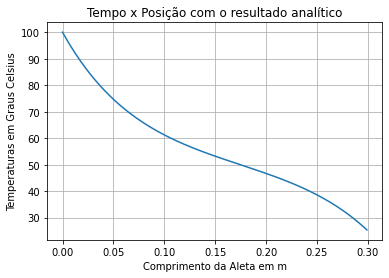

In [16]:
result_analitical = []

lista = np.arange(0,L,1e-3)

m = calculate_m(h,p,k,Atr)

theta = calculate_theta(Text,Tinf)

M = calculate_M(h,p,Atr,k,theta)

for values in lista:
    result_analitical.append(teste(calculate_theta(Text, Tinf),calculate_theta(Tb, Tinf),m,values,L) * calculate_theta(Tb, Tinf) + Tinf)

    
# Plotando o gráfico
plt.plot(lista,result_analitical)
plt.title("Tempo x Posição com o resultado analítico")
plt.xlabel("Comprimento da Aleta [m]")
plt.ylabel("Temperaturas [Celsius]")
plt.grid()
plt.show()

## Modelo numérico

0.6047999999955231
Convergiu


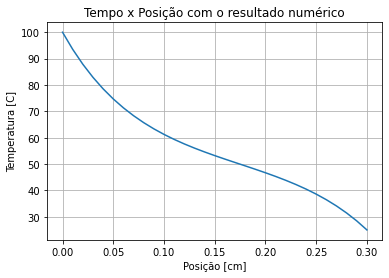

In [18]:
# Parâmetros
dt = (dx**2/(a*(h*p*dx**2/k*Atr + 2)))*0.9
interval = 1000 # número de passos
n = len(np.arange(0, interval, dt))
TM = np.zeros((n,nx))
errors = []

# Condição inicial nos nós internos
TM[0,1:nx-1] = 0.0001
# Temperatura [C] em x=0
TM[:,0] = Tb
# Temperatura [C] em x=L
TM[:,nx-1] = Text


print(dt)
for l in range(0,n-1):
    for i in range(1,nx-1):
        TM[l+1,i] = a * dt * ((TM[l,i+1]-2*TM[l,i]+TM[l,i-1])/dx**2 - ct * (TM[l,i] - Tinf)) + TM[l,i]
    error = (TM[l+1, i] - TM[l, i])/TM[l+1, i]
    if tol >= error:
        print("Convergiu")
        break


# Posições dos nós
x = np.linspace(0.0,L,nx)
# Temperatura em todos pontos no instante considerado
T = np.array(TM[l,:])

# Plotando o gráfico
plt.plot(x,T)
plt.title("Tempo x Posição com o resultado numérico")
plt.ylabel('Temperatura [C]')
plt.xlabel('Posição [cm]')
plt.grid()
plt.show()